In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [2]:
X, Y = np.loadtxt("pizza.txt", skiprows=1, unpack=True)

In [3]:
X[0:5]

array([13.,  2., 14., 23., 13.])

In [4]:
Y[0:5]

array([33., 16., 32., 51., 27.])

In [ ]:
sns.set()

[0, 50, 0, 50]

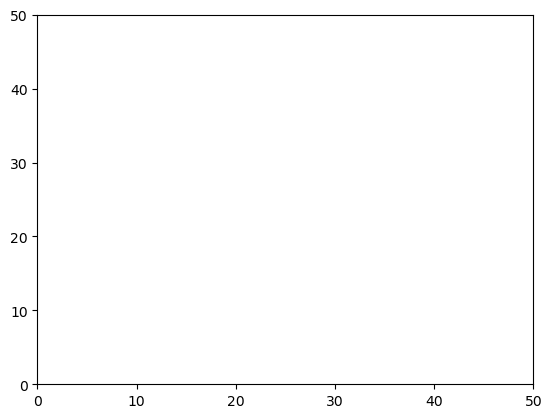

In [6]:
plt.axis([0, 50, 0, 50])

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

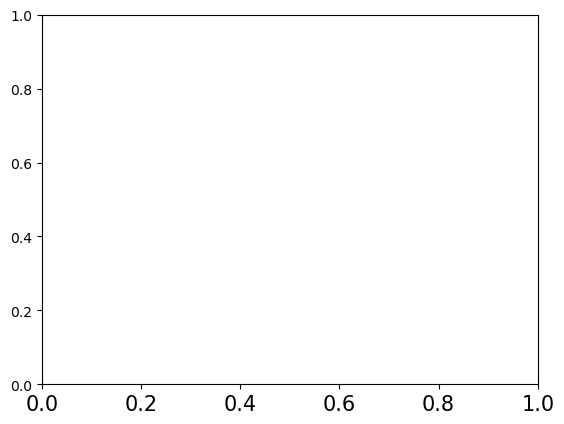

In [7]:
plt.xticks(fontsize=15)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text yticklabel objects>)

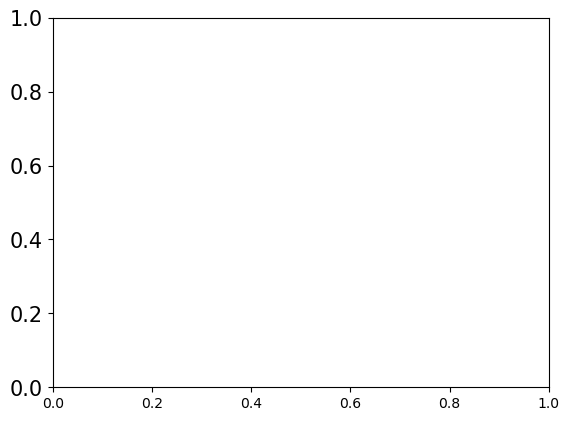

In [8]:
plt.yticks(fontsize=15)

Text(0.5, 0, 'Reservations')

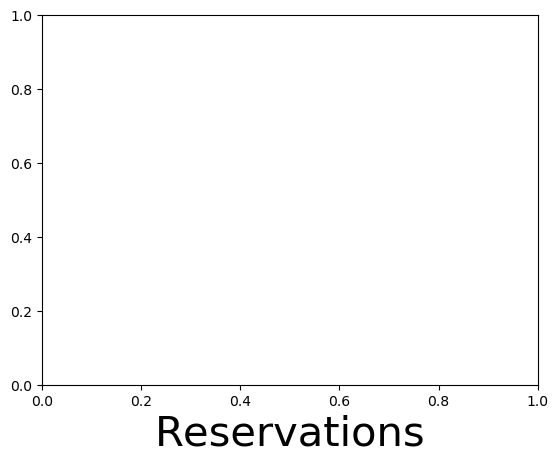

In [9]:
plt.xlabel("Reservations", fontsize=30)

Text(0, 0.5, 'Pizzas')

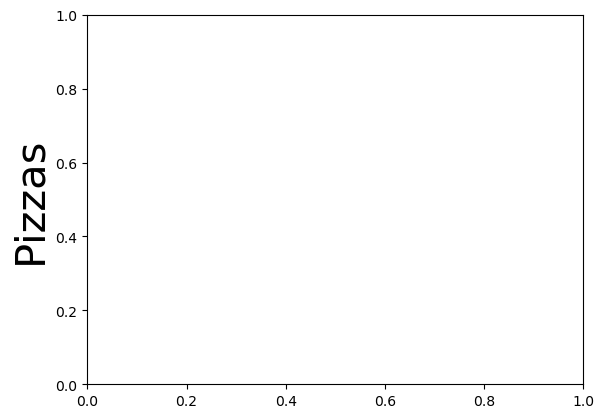

In [10]:
plt.ylabel("Pizzas", fontsize=30)

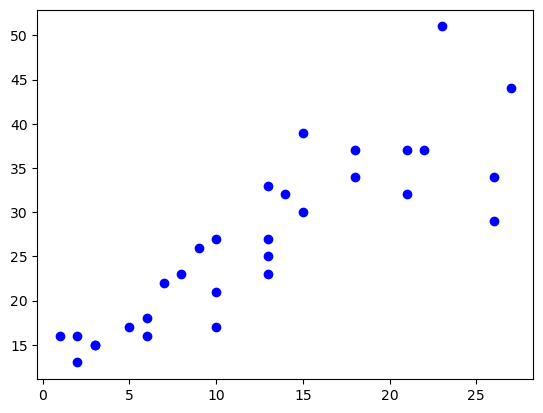

In [11]:
plt.plot(X, Y, 'bo')

In [12]:
plt.show()

In [13]:
def predict(X, w):
    return X * w 